In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

In [2]:
colors = { 'rosa':'#ff66c4' ,'azul':'#5271ff' , 'verde':'#7ED957' , 'laranja':'#f6672a' }
#usa um background escuro de fundo
plt.style.use('dark_background')
#plt.rcParams é um dicionário global que contém parâmetros de configuração para matplotlib. 
plt.rcParams['figure.figsize'] = (8,6)
#configura a largura padrão das linhas nos gráficos para 3 pontos. 
plt.rcParams['lines.linewidth'] = 3
#Define o tamanho padrao da fonte
plt.rcParams['font.size'] = 15
#Esta linha cria um dicionário bbox que define as propriedades de uma caixa de texto (ou rótulo) que pode ser usada em gráficos
bbox = dict(boxstyle='round', alpha=0.7, color=colors['rosa'])

In [3]:
# ativação da função sigmoid
def ativacao_sigmoid(x: float) -> float:
    return (1/ (1+np.e**(-x)))

Text(0.5, 1.0, 'Valor do seguro em função da idade (Com valores normalizados)')

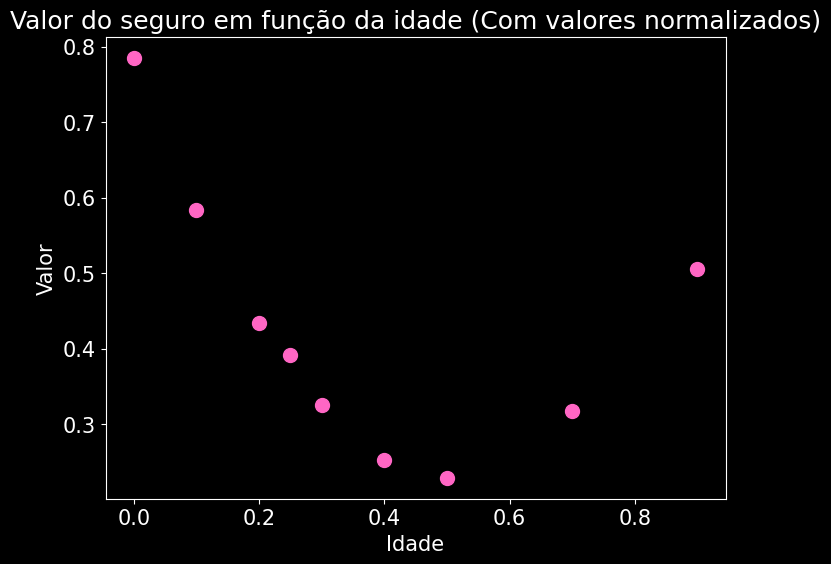

In [5]:
idade = np.array([0,0.1,0.2,0.25,0.3,0.4,0.5,0.7,0.9])
valor = np.array([((x-0.3)**2 - 0.45*x + 0.3)*2 + np.random.randn()/60 for x in idade])
plt.scatter(idade,valor,s= 100,color= colors['rosa'])
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade (Com valores normalizados)')

In [7]:
df = pd.DataFrame({'Idade': idade, 'Valor':idade})

In [8]:
# Supondo que df é um DataFrame com colunas 'Idade' e 'Valor'
x = torch.FloatTensor([df.Idade.values.astype(float)])
# x é agora um tensor de ponto flutuante com uma única linha contendo os valores da coluna 'Idade'
y = torch.FloatTensor([df.Valor.values.astype(float)])
# y é agora um tensor de ponto flutuante com uma única linha contendo os valores da coluna 'Valor'
x = y.unsqueeze(1)
# y.unsqueeze(1) adiciona uma dimensão ao tensor y na posição 1
# Se y tinha shape [m], x agora terá shape [m, 1]
y = x.view(x.size(1), -1)
# x.size(1) retorna o tamanho da segunda dimensão de x, que é m
# x.view(x.size(1), -1) reorganiza o tensor para ter shape [m, n], onde n é inferido automaticamente
# Isso resulta em um tensor y com shape [m, n]


C:\Users\kaio\AppData\Local\Temp\ipykernel_28304\4249144858.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  x = torch.FloatTensor([df.Idade.values.astype(float)])


In [ ]:
class Model(nn.Module):
    
    def __init__(self,hidden_neurons =2):
        super().__init__()
        self.hidden_neurons = hidden_neurons
        self.input_layer = nn.Linear(in_features=1,out_features=self.hidden_neurons,bias=False)
        self.output_layer = nn.Linear(in_features=2,out_features=1)
        self.activation = nn.Sigmoid
        
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x    

In [ ]:
EPOCH = 1000
LR = 0,1